In [1]:
import scvelo as scv
import scanpy as sc
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
scv.set_figure_params('scvelo')
scv.settings.presenter_view = True

In [2]:
adata = scv.read("../tmp/06.HS_BM_donor1.h5ad")
adata

AnnData object with n_obs × n_vars = 6195 × 17220
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'donor', 'DF.classifications', 'S.Score', 'G2M.Score', 'Phase', 'RNA_snn_res.0.1', 'RNA_snn_res.0.2', 'RNA_snn_res.0.4', 'RNA_snn_res.0.6', 'RNA_snn_res.0.8', 'RNA_snn_res.1', 'seurat_clusters', 'celltype'
    var: 'features', 'spliced_features', 'unspliced_features'
    obsm: 'X_diffusion.map', 'X_dm.tsne', 'X_dm.umap', 'X_fr', 'X_pca', 'X_tsne', 'X_umap'
    layers: 'spliced', 'unspliced'

In [3]:
adata.obs['seurat_clusters'] = adata.obs['seurat_clusters'].astype('category')
adata.obs['celltype'] = adata.obs['celltype'].astype('category')

In [4]:
adata = adata[adata.obs.celltype.isin(["HSC", "Ery"]), ]

In [5]:
adata

View of AnnData object with n_obs × n_vars = 2192 × 17220
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'donor', 'DF.classifications', 'S.Score', 'G2M.Score', 'Phase', 'RNA_snn_res.0.1', 'RNA_snn_res.0.2', 'RNA_snn_res.0.4', 'RNA_snn_res.0.6', 'RNA_snn_res.0.8', 'RNA_snn_res.1', 'seurat_clusters', 'celltype'
    var: 'features', 'spliced_features', 'unspliced_features'
    obsm: 'X_diffusion.map', 'X_dm.tsne', 'X_dm.umap', 'X_fr', 'X_pca', 'X_tsne', 'X_umap'
    layers: 'spliced', 'unspliced'

In [6]:
genes = [i.rstrip() for i in open("../tmp/07-2.more_spliced_genes.txt").readlines()]
adata = adata[:, genes]
adata

View of AnnData object with n_obs × n_vars = 2192 × 8371
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'donor', 'DF.classifications', 'S.Score', 'G2M.Score', 'Phase', 'RNA_snn_res.0.1', 'RNA_snn_res.0.2', 'RNA_snn_res.0.4', 'RNA_snn_res.0.6', 'RNA_snn_res.0.8', 'RNA_snn_res.1', 'seurat_clusters', 'celltype'
    var: 'features', 'spliced_features', 'unspliced_features'
    obsm: 'X_diffusion.map', 'X_dm.tsne', 'X_dm.umap', 'X_fr', 'X_pca', 'X_tsne', 'X_umap'
    layers: 'spliced', 'unspliced'

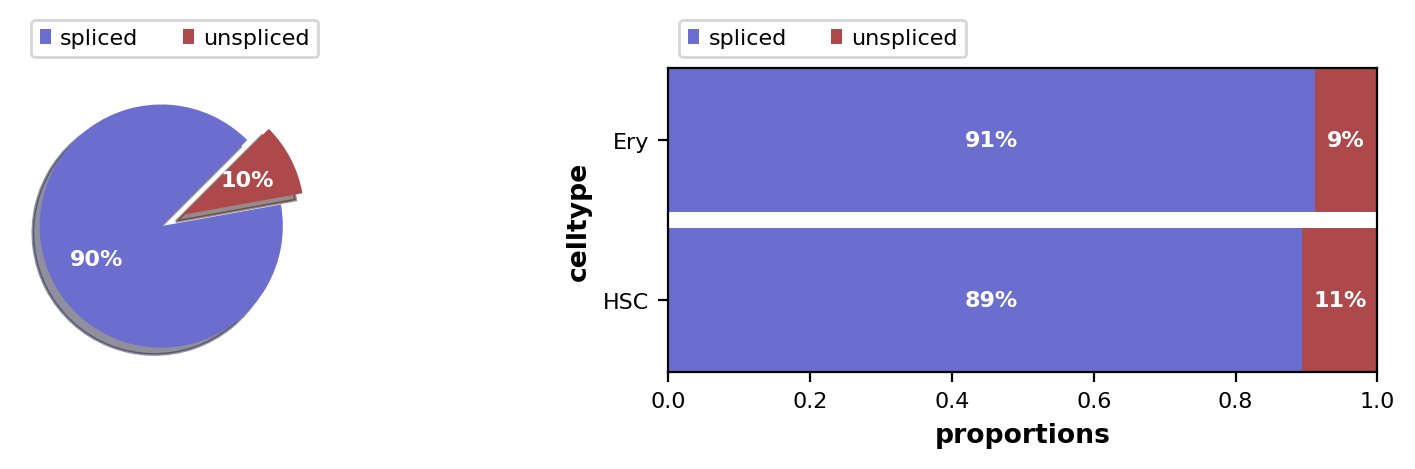

In [7]:
scv.pl.proportions(adata, groupby = "celltype")

In [8]:
scv.pp.filter_and_normalize(adata, min_shared_counts=50, n_top_genes=500)

Filtered out 5867 genes that are detected 50 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 500 highly variable genes.
Logarithmized X.


In [9]:
## default: it will perform the PCA
# scv.pp.moments(adata, n_pcs=30, n_neighbors=30)
## if we want to use the stored cell embeddings
scv.pp.moments(adata, n_pcs=30, use_rep="X_pca", n_neighbors=30)

computing neighbors
    finished (0:00:11) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [10]:
scv.tl.velocity(adata, mode='steady_state')

computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [11]:
scv.tl.velocity_graph(adata)

computing velocity graph (using 1/24 cores)


  0%|          | 0/2192 [00:00<?, ?cells/s]

    finished (0:00:02) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:00) --> added
    'velocity_fr', embedded velocity vectors (adata.obsm)


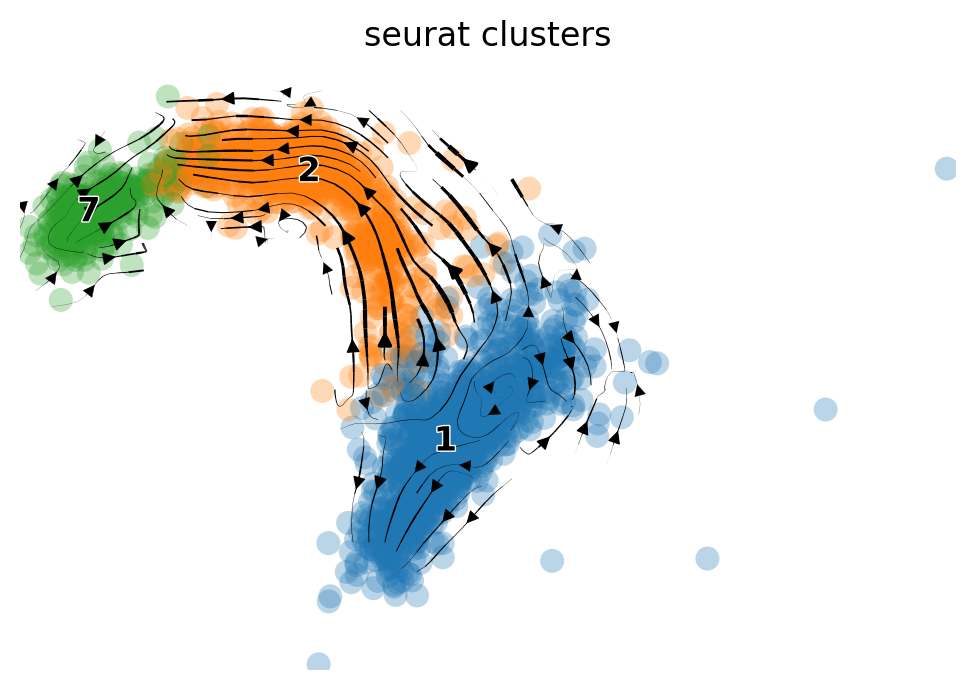

In [12]:
scv.pl.velocity_embedding_stream(adata, basis="X_fr", color="seurat_clusters")

In [13]:
scv.tl.rank_velocity_genes(adata, groupby='seurat_clusters', min_corr=.3)

df = scv.DataFrame(adata.uns['rank_velocity_genes']['names'])
df.head(5)

ranking velocity genes
    finished (0:00:00) --> added 
    'rank_velocity_genes', sorted scores by group ids (adata.uns) 
    'spearmans_score', spearmans correlation scores (adata.var)


/home/jarning/.conda/envs/scvelo/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `scvelo.read_load.get_df` is deprecated since scVelo v0.2.4 and will be removed in a future version. Please use `scvelo.core.get_df` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


1        2        7
0        KLF1      CA2  SLC40A1
1  AC002454.1    PLAC8     GMPR
2     ZFP36L1     SELL     SELL
3       APOC1      AVP    YPEL5
4       CCND3  SLC40A1     CKS2

In [ ]:
# scv.pl.scatter(adata, genes, color=['seurat_clusters', 'velocity'])

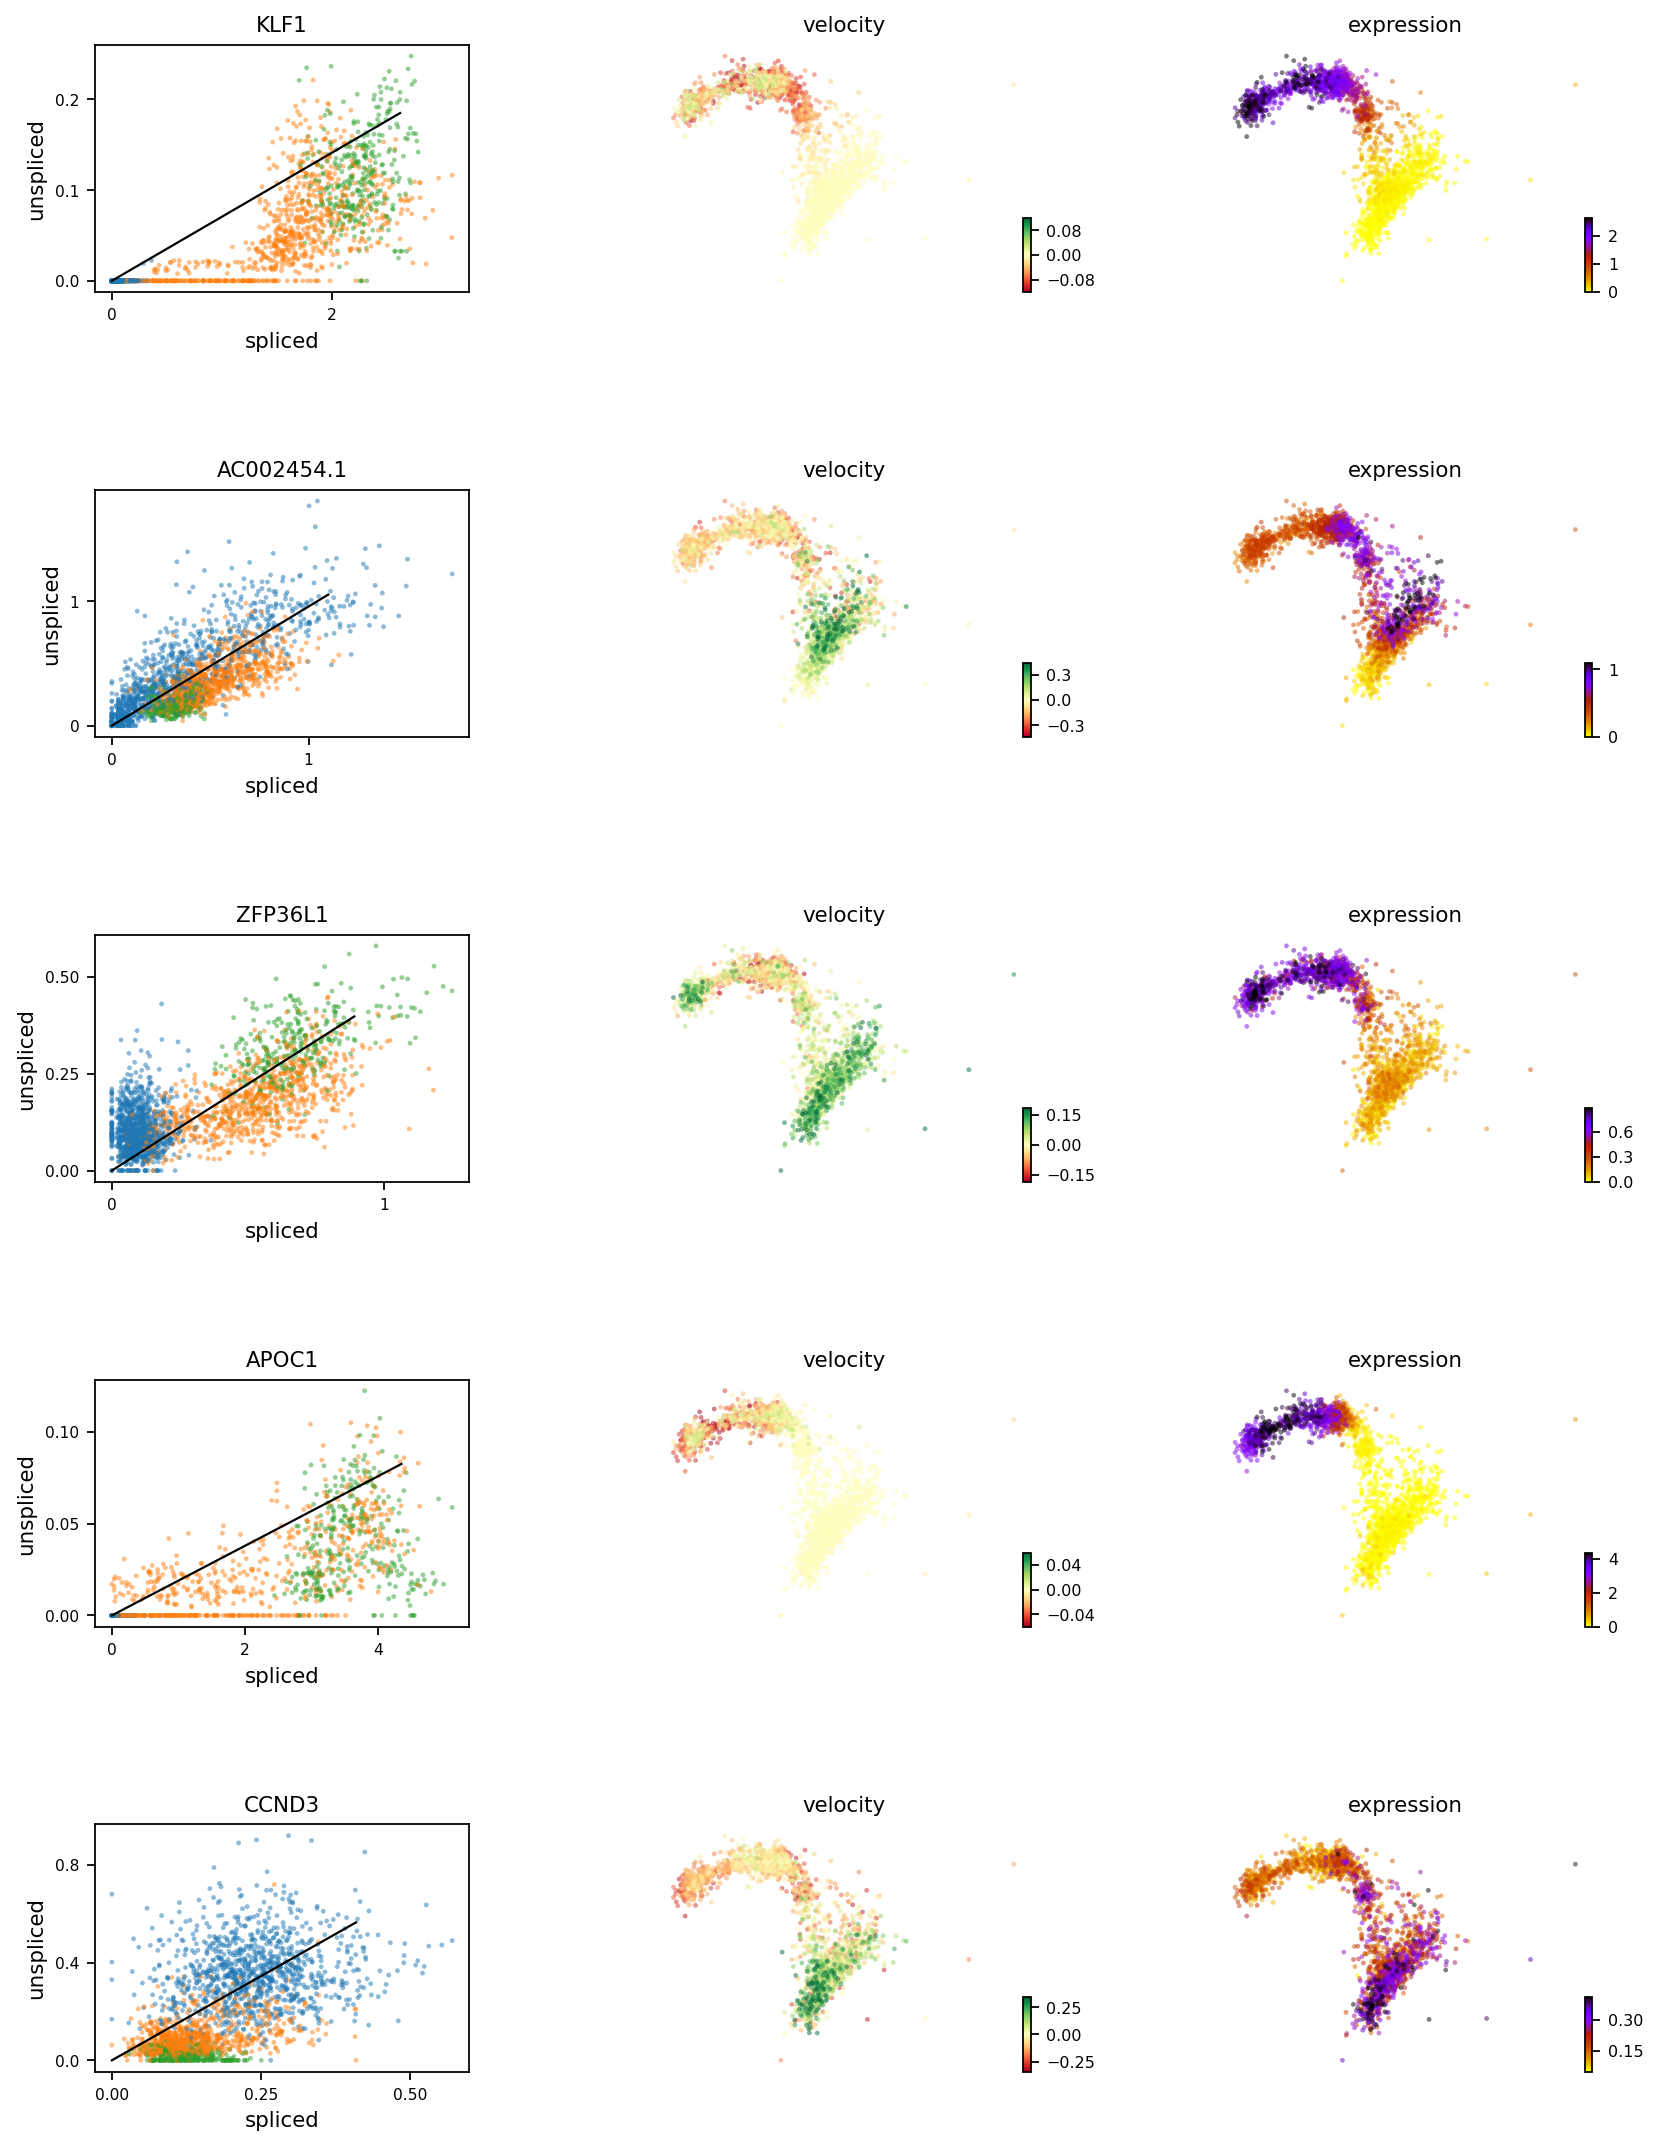

In [16]:
genes = df["1"].tolist()[0:5]
scv.pl.velocity(adata, genes, color="seurat_clusters", basis="X_fr", ncols=1, figsize=(6,5), dpi=600)

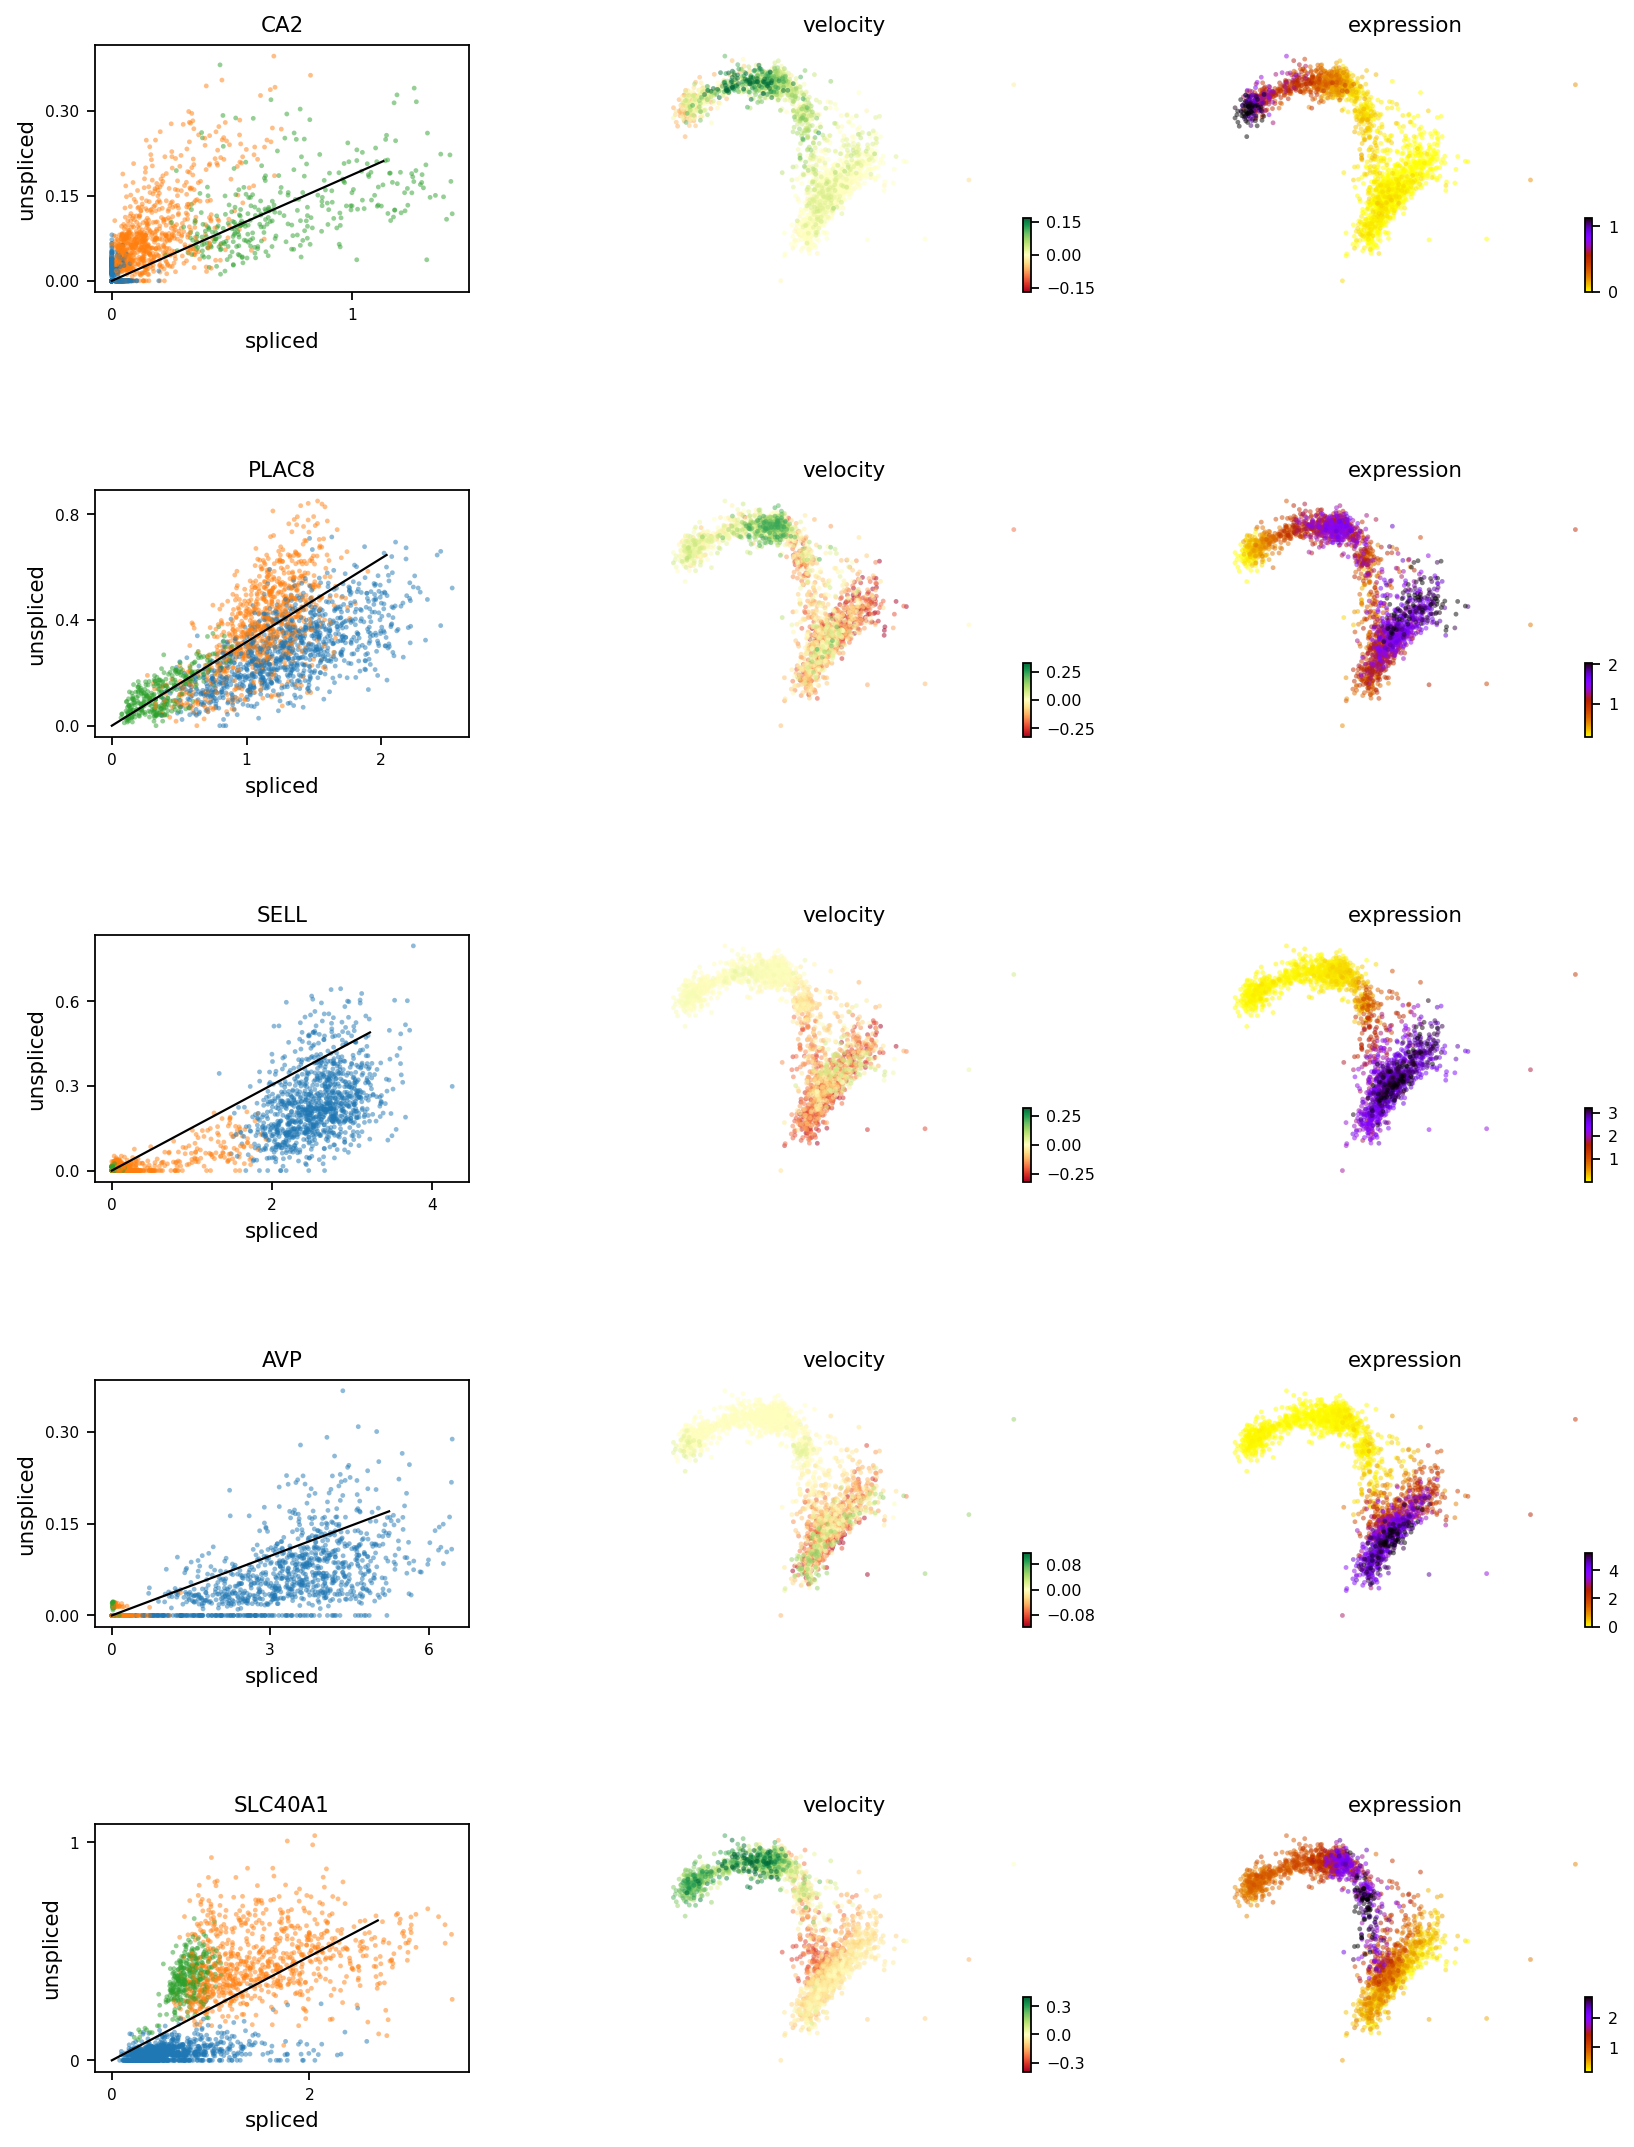

In [14]:
genes = df["2"].tolist()[0:5]
scv.pl.velocity(adata, genes, color="seurat_clusters", basis="X_fr", ncols=1, figsize=(6,5), dpi=600)

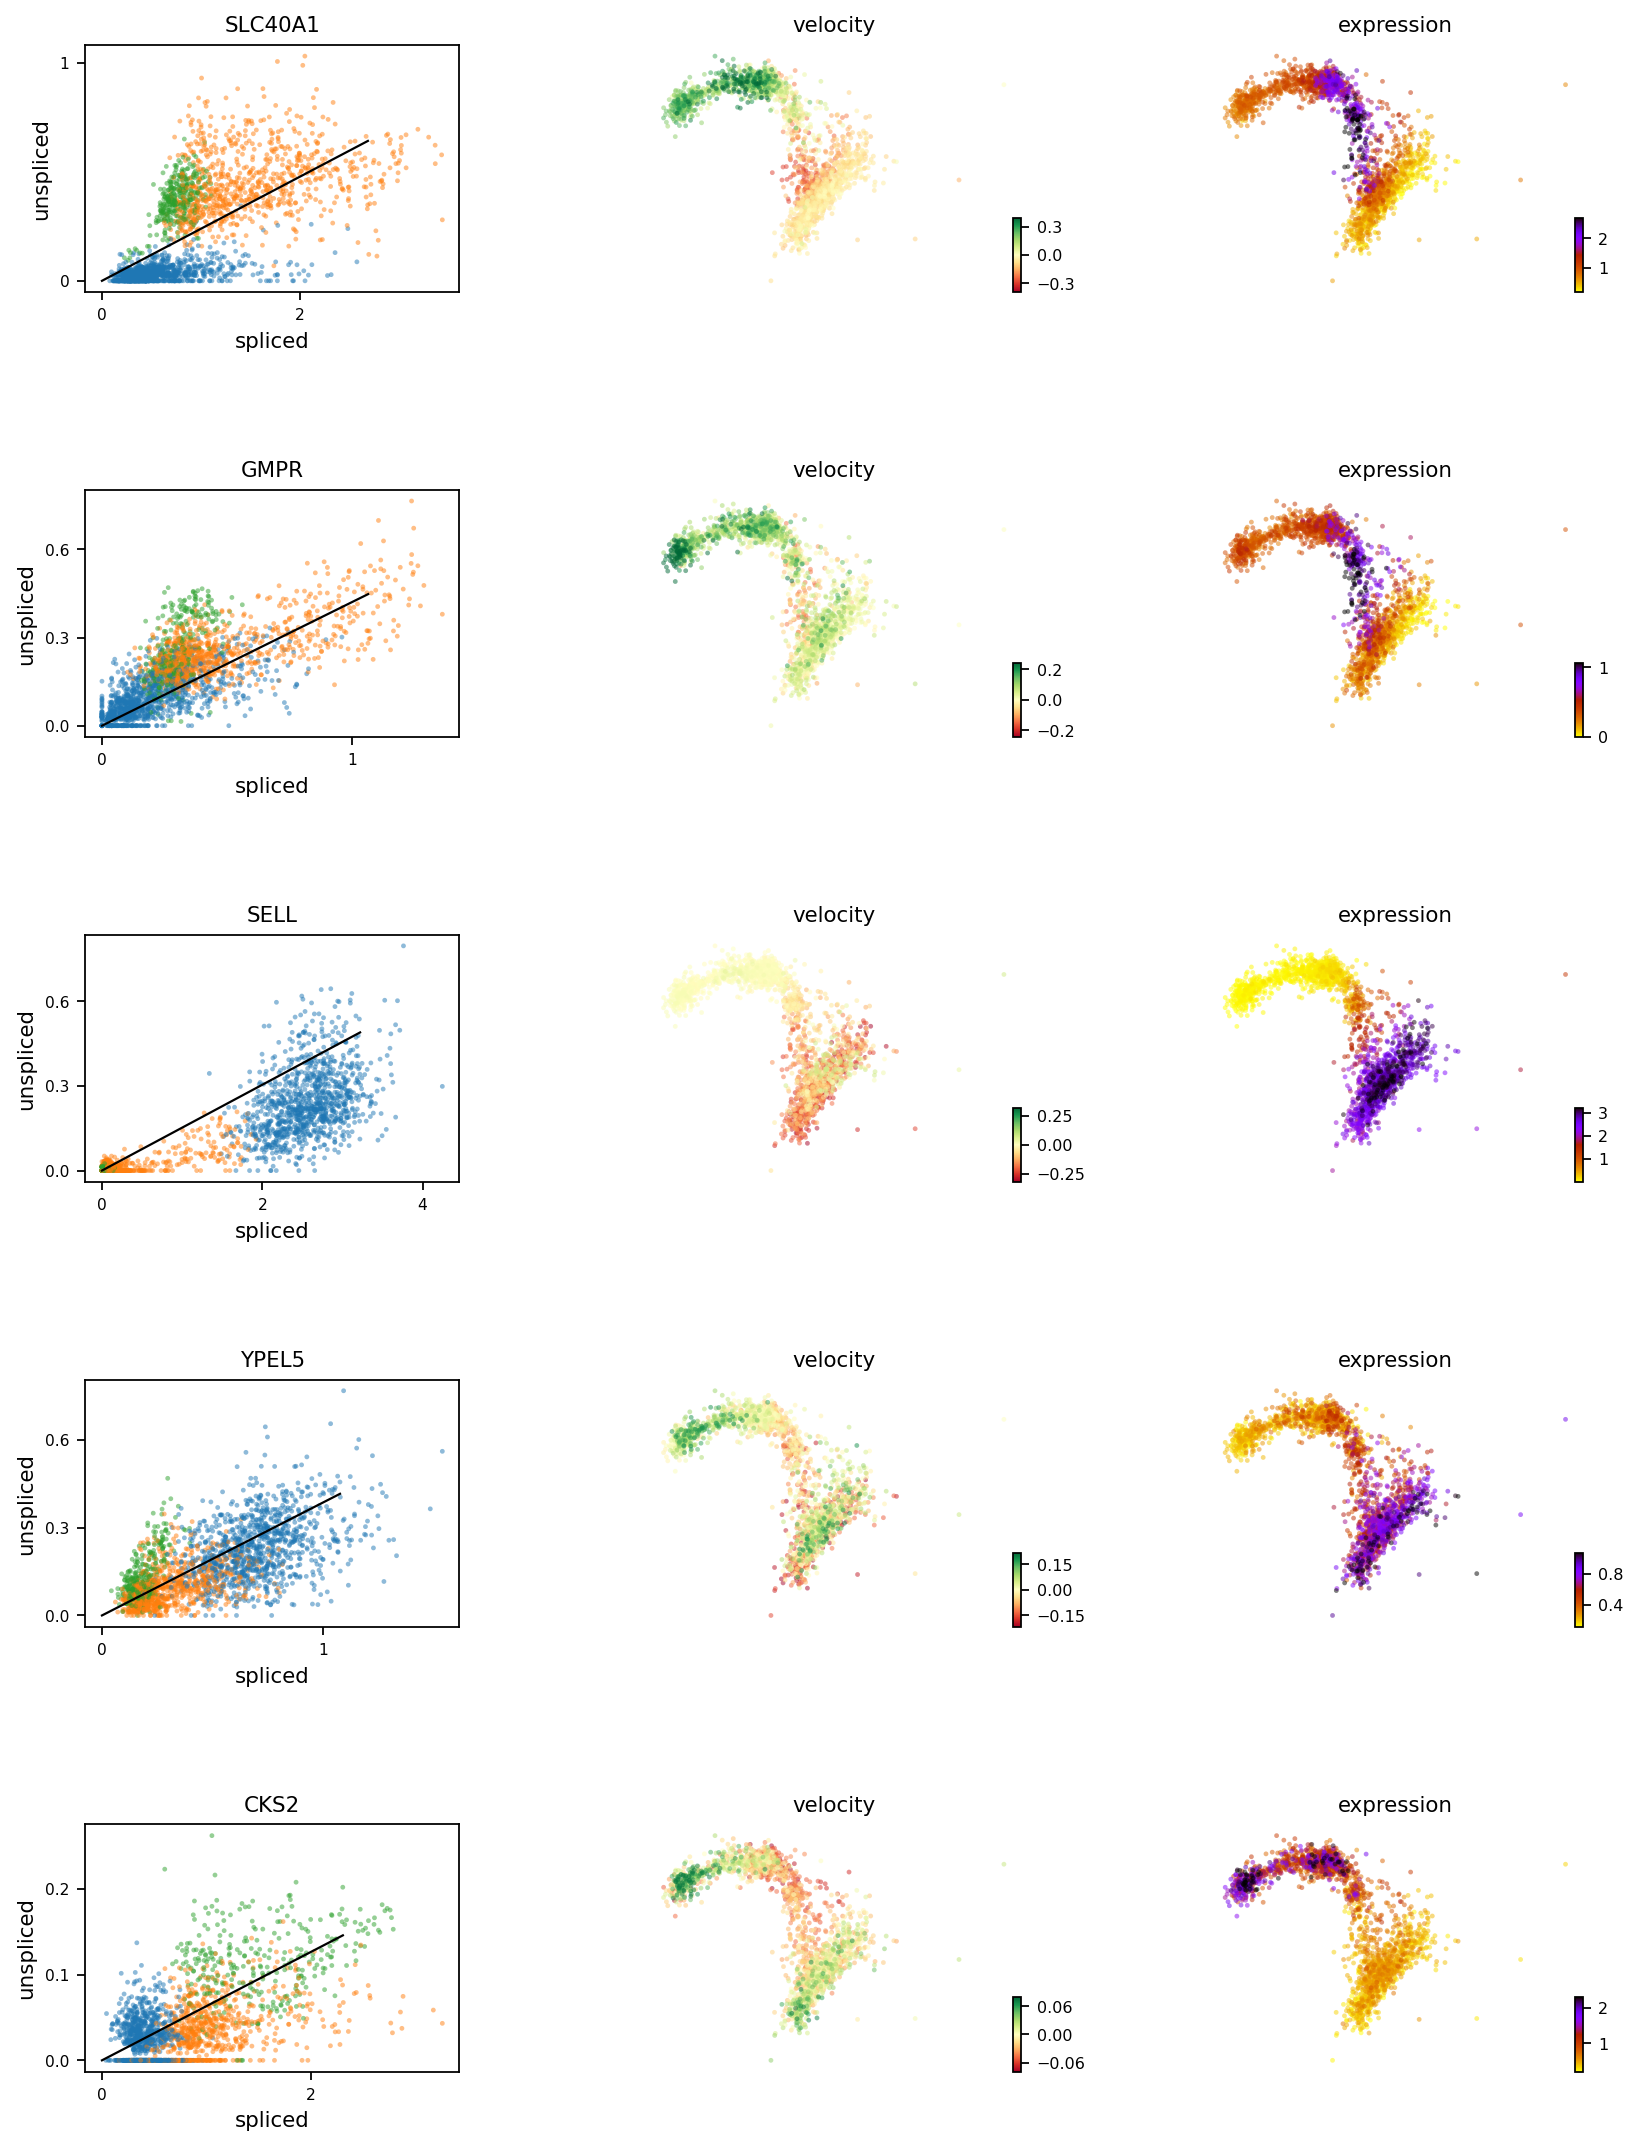

In [15]:
genes = df["7"].tolist()[0:5]
scv.pl.velocity(adata, genes, color="seurat_clusters", basis="X_fr", ncols=1, figsize=(6,5), dpi=600)

如果你在保存scVelo处理后的anndata时遇到如下报错：

https://github.com/theislab/scvelo/issues/255

执行下面这句被注释了的代码

In [ ]:
# adata.__dict__['_raw'].__dict__['_var'] = adata.__dict__['_raw'].__dict__['_var'].rename(columns={'_index': 'features'})

In [ ]:
adata.write("../tmp/07_HS_BM_donor1.Ery_lineage.scVelo.h5ad")